In [1]:
### 카카오API로 읽어온 책 데이터의 카테고리별 출간날짜를 박스그래프로 나타내보자

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#kakao-search-book 에서 구축한 데이터를 불러온다.
df = pd.read_json('data/bookData.json', orient = 'record', encoding = 'utf-8')
df[0:2]

,category,bookList
0,수학,"[{'title': '대학 수학 능력 평가 준비 0.1%의 비밀, 아두이노 기초편'..."
1,과학,"[{'title': '생명: 생물의 과학(12판)', 'authors': ['정종우..."


In [4]:
categoryList = ["수학","과학","영어","정치","지식","요리","주식","위로"]

resultDict={}
cnt = 0
for i in df['bookList']:
    value = []
    for book in i:
        date = book['date'].split("-")
        nDate = (int(date[0])-2021) * 365 + int(date[1])*30 + int(date[2])
        value.append(nDate)
    resultDict[categoryList[cnt]] = value
    cnt += 1

resultDf = pd.DataFrame(resultDict)
resultDf.head()

,수학,과학,영어,정치,지식,요리,주식,위로
0,211,270,405,210,211,212,224,227
1,211,224,217,210,211,212,217,220
2,210,216,211,208,211,204,211,211
3,209,215,211,205,210,204,211,210
4,208,211,210,205,210,204,210,210


# 설정 되어있는 폰트 사이즈
10.0
# 설정 되어있는 폰트 글꼴
['sans-serif']


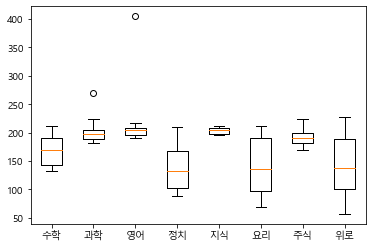

In [5]:
import matplotlib.pyplot as plt
# path = 'C:/Windows/Fonts/맑은고딕.ttf'
# fontprop = fm.FontProperties(fname=path, size=12)
print('# 설정 되어있는 폰트 사이즈')
print (plt.rcParams['font.size'] ) 
print('# 설정 되어있는 폰트 글꼴')
print (plt.rcParams['font.family'] )
plt.rc('font', family = 'Malgun Gothic')

plt.boxplot([resultDf['수학'], resultDf['과학'],resultDf['영어'],resultDf['정치'],resultDf['지식'],resultDf['요리'], resultDf['주식'], resultDf['위로']]) # 두가지 데이터를 표시
plt.xticks([1,2,3,4,5,6,7,8], ['수학', '과학', '영어', '정치', '지식', '요리', '주식', '위로']) #x축에 표시하는 눈금지정 함수, 1과 2 위치에 Female과 Male이라는 이름으로 표시
plt.show()

# 박스차트의 길이가 짧을 수록 최근에 관련 책이 많이 나온 것이다.